In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
weight_class = [125,133,141,149,157,165,174,184,197,285]
random_state = 87

In [3]:
df_list = []
for item in weight_class:
    df_list.append(pd.read_csv('C:/Users/fq1228hj/Documents/NCAA Wrestling/2019_Ranked_Qualifiers_Scored/{}_ranked_ncaa_qualifiers.csv'.format(item)))

In [4]:
df = pd.concat(df_list)

## Learning Data should drop: 'Season','WeekNumber','WeightClass','LastName','FirstName','SchoolName','SchoolRank', and all tournament points except 'TotalPoints'
## Maybe drop Conference, or maybe this is relevant.

In [5]:
learning_data = df.drop(['Record','Season','WeekNumber','WeightClass','LastName','FirstName','SchoolName','SchoolRank','BonusPoints','AdvPoints','PlacementPoints'],axis=1)
learning_data.set_index('NameLower',inplace=True)

In [6]:
conferences_series = pd.Series(learning_data['Conference'].unique())

## One-Hot Encode Categorical Conference Variable

In [7]:
for i in range(0,7):
    learning_data[conferences_series[i]] = np.zeros(len(learning_data['Conference']))
    for j in range(0,len(learning_data['Conference'])-1):
        if learning_data['Conference'][j] == conferences_series[i]:
            learning_data[conferences_series[i]][j] = 1
        

C:\Users\fq1228hj\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
learning_data['EligibilityYear_num'] = learning_data['EligibilityYear'].replace(to_replace=['FR','SO','JR','SR'],value=[0,1,2,3])

In [9]:
learning_data.drop(['EligibilityYear','Conference'],axis=1,inplace=True)

In [34]:
learning_data

,Rank,WinPercentage,BonusPercentage,Wins,Losses,EloPoints,TotalPoints,Big Ten,Big 12,ACC,EIWA,PAC 12,MAC,EWL,EligibilityYear_num,TotalPointsTrans
NameLower,,,,,,,,,,,,,,,,
spencerlee,1,88.46,82.61,23,3,1618.78,25.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.277145
sebastianrivera,2,93.75,63.33,30,2,1585.02,15.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.803360
nickpiccininni,3,94.59,80.00,35,2,1581.12,15.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2.803360
jackmueller,4,95.45,80.95,21,1,1558.95,19.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2.995732
vitaliarujau,5,88.57,61.29,31,4,1537.20,15.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2.803360
ronniebresser,6,86.67,61.54,26,4,1512.87,7.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,2.140066
rayvonfoley,7,85.71,69.44,36,6,1500.64,9.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.351375
seanrussell,8,82.35,64.29,28,6,1496.89,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.609438
seanfausz,11,77.78,50.00,14,4,1465.57,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1.609438


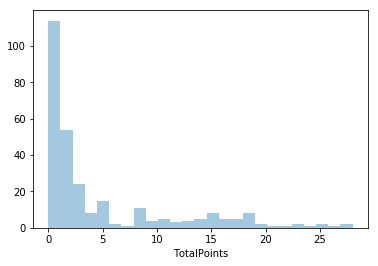

In [10]:
sns.distplot(learning_data['TotalPoints'],kde=False,bins=25)

## Transform Exponential Distribution of scores

In [11]:
learning_data['TotalPointsTrans']=np.log(learning_data['TotalPoints']+1)

In [12]:
X = learning_data.drop(['TotalPointsTrans','TotalPoints'],axis=1)
y = learning_data['TotalPointsTrans']

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mms = MinMaxScaler()

In [15]:
mms.fit(X)

C:\Users\fq1228hj\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
X_scaled = mms.transform(X)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=random_state)

In [19]:
linreg = LinearRegression()

In [20]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
preds = linreg.predict(X_test)

## Set min score to 0 and max score to 26

In [22]:
preds1 = []
for item in preds:
    if np.expm1(item) < 0:
        preds1.append(0)
    elif np.expm1(item) > 0 and np.expm1(item) < 29:
        preds1.append(item)
    else:
        preds1.append(np.log(27))

In [23]:
print(np.sqrt(metrics.mean_squared_error(y_test,preds1)))

0.37832767871737855


In [24]:
df1 = pd.DataFrame(y_test)

In [25]:
df1['PredictedTrans'] = preds1

In [26]:
df1['TotalPoints']=np.expm1(df1['TotalPointsTrans'])

In [27]:
df1['ActualPredicted']=np.expm1(df1['PredictedTrans'])

In [33]:
df1.drop(['PredictedTrans','TotalPointsTrans'],axis=1)

,TotalPoints,ActualPredicted
NameLower,,
brycewest,0.0,0.000000
devinskatzka,8.5,5.410951
josephmckenna,19.5,19.969703
mitchmoore,2.5,2.690921
coleverner,0.5,0.480371
brycesteiert,8.5,4.305002
sawyerroot,0.0,0.154751
mattkolodzik,10.5,7.541452
jasonnolf,27.0,26.000000


C:\Users\fq1228hj\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(27.125, 0.5, 'Predicted Y')

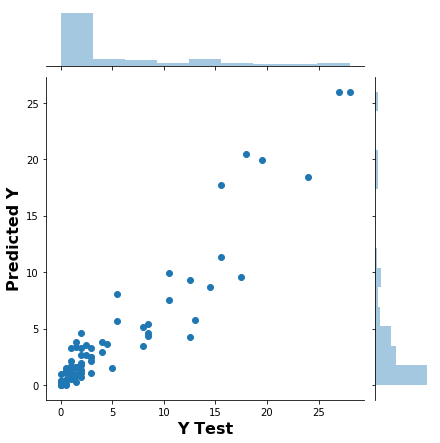

In [29]:
#Not Transformed
p = sns.jointplot(list(np.expm1(df1['TotalPointsTrans'])), list(np.expm1(df1['PredictedTrans'])))
p.set_axis_labels('x', 'y', fontsize=16)
p.ax_joint.set_xlabel('Y Test', fontweight='bold')
p.ax_joint.set_ylabel('Predicted Y', fontweight='bold')

Text(27.125, 0.5, 'Log(Predicted Y)')

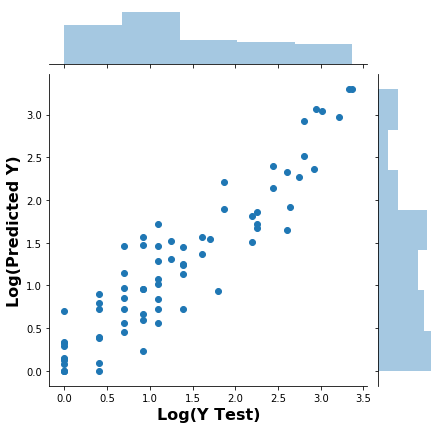

In [30]:
#Transformed
p = sns.jointplot(y_test, preds1)
p.set_axis_labels('x', 'y', fontsize=16)
p.ax_joint.set_xlabel('Log(Y Test)', fontweight='bold')
p.ax_joint.set_ylabel('Log(Predicted Y)', fontweight='bold')

## RMSE for Transformed Predictions

In [31]:
print(np.sqrt(metrics.mean_squared_error(y_test,preds1)))

0.37832767871737855
